# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [1]:
 !pip install wandb
 !pip3 install pytorch_lightning torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 15.5 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [2]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchmetrics import Accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

# You may add any imports you need

In [4]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)


In [5]:

!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-16 18:28:30--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-16 18:28:31--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5a0ca933ab437d5a832814b6d4.dl.dropboxusercontent.com/cd/0/get/CHrD-NXPmeqkgP_rYEqlCEwAN4YLfUBIovdgLGa3NEEpIbA3GwnxnepX42MPU0sCcN9NIAqFcyu966Msccn5R4nJ4mI6eNbR2H8FqLT_m3RulwTImgEyc0m_TmhCvOgEGWacOhwc0EZ9a-ZXgA3DbHgj/file?dl=1# [following]
--2023-11-16 18:28:31--  https://uc5a0ca933ab437d5a832814b6d4.dl.dropboxusercontent.com/cd/0/get/CHrD-NXPmeqkgP_rYEqlCEwAN4YLfUBIovdgLGa3NEEpIbA3GwnxnepX42MPU0sCcN9NIAqFcyu966Msccn5R4nJ4mI6eNbR2H8FqLT

In [6]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 3.0 MB/s eta 0:00:00


In [7]:
import patoolib

In [8]:
patoolib.extract_archive('dataset.zip')

INFO patool: Extracting dataset.zip ...
INFO:patool:Extracting dataset.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_wx4tfmdt -- dataset.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_wx4tfmdt -- dataset.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... dataset.zip extracted to `dataset1' (local file exists).
INFO:patool:... dataset.zip extracted to `dataset1' (local file exists).


'dataset1'

https://mdiqbalbajmi00786.medium.com/how-to-unzip-a-zip-file-in-jupyter-google-colab-e024c5707e68

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

Для нормализации картинок сделаем следующее: загрузим данные с помощью Dataloader. Далее так как наш датасет довольно большой и мы не можем посчитать среднее и стандратное отклонение нна всем датасете, будем считать эти характеристики по батчам с помощью функции. В целом мы могли использовать уже посчитанные среднее и стандратное отклонение для ImageNet, но, посчитав, самостоятельно убедились, что они похожи. (Данные похожи, так как это обычные классы и картинки, а не медицинские данные, например). Сайт, с помощью которого я это написала:
https://www.binarystudy.com/2022/04/how-to-normalize-image-dataset-inpytorch.html

In [9]:
import PIL

train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor()
    ]
)
val_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor()
    ]
)

train_dataset = ImageFolder('/content/dataset1/dataset/dataset/train', transform=train_transform)
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=2)

In [10]:
def batch_mean_and_std(image_data_loader):

    cnt = 0
    fst_moment = torch.empty(3)
    snd_moment = torch.empty(3)

    for images, _ in image_data_loader:
        b, c, h, w = images.shape
        nb_pixels = b * h * w
        sum_ = torch.sum(images, dim=[0, 2, 3])
        sum_of_square = torch.sum(images ** 2,
                                  dim=[0, 2, 3])
        fst_moment = (cnt * fst_moment + sum_) / (
                      cnt + nb_pixels)
        snd_moment = (cnt * snd_moment + sum_of_square) / (
                            cnt + nb_pixels)
        cnt += nb_pixels

    mean, std = fst_moment, torch.sqrt(
      snd_moment - fst_moment ** 2)
    return mean,std

train_mean, train_std = batch_mean_and_std(train_dataloader)
print(f'train mean: {train_mean}, train std: {train_std}')

train mean: tensor([0.4477, 0.4166, 0.3690]), train std: tensor([0.2923, 0.2820, 0.2883])


In [11]:
train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        transforms.Normalize((0.4478, 0.4167, 0.3691), (0.2923, 0.2820, 0.2883)),
    ]
)
val_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        transforms.Normalize((0.4478, 0.4167, 0.3691), (0.2923, 0.2820, 0.2883)),
    ]
)

train_dataset = ImageFolder('/content/dataset1/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset1/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=256, shuffle=False, num_workers=2)

In [12]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

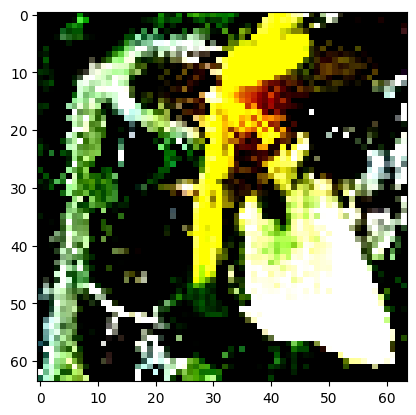

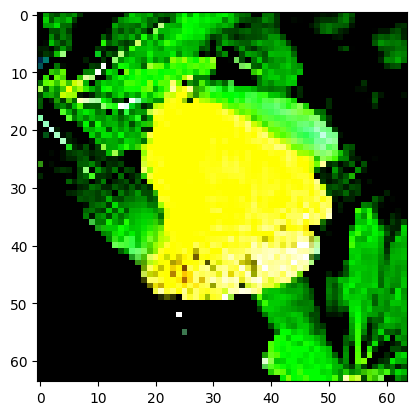

In [13]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [14]:
from torchvision.models import resnet18


### Тренировочный класс lightning

In [15]:
lambda_func = lambda epoch: 0.975**epoch

In [16]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate) -> None:
        super().__init__()
        self.learning_rate = learning_rate
        self.model = model
        self.model.fc = nn.Linear(self.model.fc.in_features, 200)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.scheduler = torch.optim.lr_scheduler.LambdaLR(self.optimizer, lr_lambda=lambda_func)
        self.loss = nn.CrossEntropyLoss()
        self.accuracy = Accuracy(task= "multiclass", num_classes=200)

    def forward(self, x) -> torch.Tensor:
        preds = self.model(x)
        return preds

    def configure_optimizers(self):
        return [self.optimizer], [self.scheduler]

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = self.accuracy(torch.argmax(preds, dim=-1).long(), target.long())
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)

Код взят с пятого семинара.

In [17]:
wandb_logger = WandbLogger(log_model='all')
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = resnet18(weights=None).to(device)
module = YourModule(model, learning_rate=0.001)

Побор гиперпараметра leraning rate подберем с помощью класса Tuner. Код взят с сайта lightning ai https://pytorch-lightning.readthedocs.io/en/1.2.10/api/pytorch_lightning.tuner.lr_finder.html

In [18]:
from pytorch_lightning.tuner.tuning import Tuner


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
wandb: Currently logged in as: iamtanyaaa. Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.052480746024977286
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_e53c2b8b-2bfb-4677-a090-572aa6b4e63a.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_e53c2b8b-2bfb-4677-a090-572aa6b4e63a.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name     | Type               | Params
------------------------------------------------
0 | model    | ResNet             | 11.3 M
1 | loss     | CrossEntropyLoss   | 0     
2 | accuracy | MulticlassAccuracy | 0     
------------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


{'lr': [1e-05, 1.202264434617413e-05, 1.3182567385564071e-05, 1.4454397707459275e-05, 1.5848931924611138e-05, 1.7378008287493754e-05, 1.9054607179632474e-05, 2.08929613085404e-05, 2.2908676527677732e-05, 2.5118864315095805e-05, 2.7542287033381663e-05, 3.0199517204020165e-05, 3.311311214825912e-05, 3.630780547701014e-05, 3.981071705534973e-05, 4.365158322401661e-05, 4.7863009232263844e-05, 5.248074602497726e-05, 5.75439937337157e-05, 6.309573444801933e-05, 6.918309709189364e-05, 7.585775750291839e-05, 8.317637711026712e-05, 9.120108393559098e-05, 0.0001, 0.00010964781961431853, 0.00012022644346174131, 0.00013182567385564074, 0.00014454397707459272, 0.00015848931924611134, 0.00017378008287493755, 0.00019054607179632476, 0.00020892961308540398, 0.00022908676527677737, 0.00025118864315095795, 0.0002754228703338166, 0.00030199517204020164, 0.00033113112148259116, 0.00036307805477010145, 0.00039810717055349735, 0.0004365158322401659, 0.0004786300923226383, 0.0005248074602497726, 0.0005754399

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=12` reached.


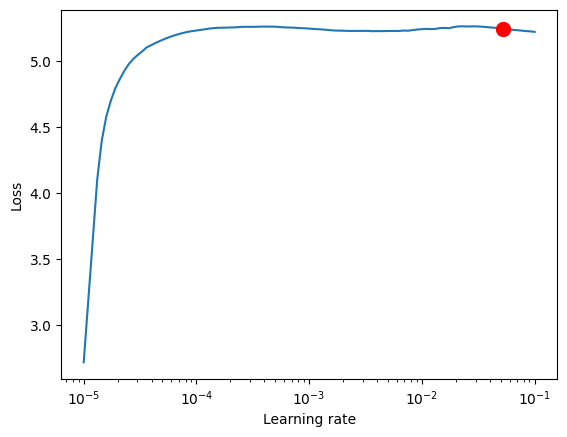

In [19]:
trainer = pl.Trainer(accelerator="gpu", max_epochs=12, logger=wandb_logger)
tuner = Tuner(trainer)

# Run learning rate finder
lr_finder = tuner.lr_find(module, train_dataloaders=train_dataloader, min_lr=0.00001, max_lr=0.1)

# Results can be found in
print(lr_finder.results)

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

# Pick point based on plot, or get suggestion
new_lr = lr_finder.suggestion()

# update hparams of the model
module.hparams.lr = new_lr

# Fit model
trainer.fit(module, train_dataloader, val_dataloader)

### Валидация результатов задания

Перепишем функцию валидации для импортированной модели. Здесь я использовала атрибуты класса YourModule accuracy и loss, они просто отсылают нас к уже написанным функциям.

In [20]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    acc_counter = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            preds = model(images)
            loss = module.loss(preds, labels)
            acc_batch = module.accuracy(preds.cpu(), labels.cpu())
        acc_counter += acc_batch
    acc_counter = acc_counter / len(test_dataloader)
    return acc_counter

In [21]:
accuracy_final = evaluate_task(model, val_dataloader)
print(accuracy_final)
print(f"Оценка за это задание составит {np.clip(10 * accuracy_final / 0.44, 0, 10):.2f} баллов")


100%|██████████| 40/40 [00:05<00:00,  6.99it/s]

tensor(0.4095)
Оценка за это задание составит 9.31 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

В этом задании я очень долго пыталась выбить качество с помощью моделей ResNet, пробоавала разные аугментации, без них, оптимайзеры, шедулеры, подбор гиперпараметров, но это давало лишь незначительные изменения в качестве и больше 0.65 у меня выбить никак не получалось. Поэтому я решила сразу перейти на более сложную модель vision transformer, и качество пробилось с первой эпохи.
Обучающий ролик:
https://www.youtube.com/watch?v=1ytfli6sGt4
Соотвутсвующий код с гитхаба:
https://github.com/AarohiSingla/Image-Classification-Using-Vision-transformer

In [22]:
from torchvision.models import vit_l_16


In [23]:
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [24]:
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device) # импортировала предобученную модель с весами

for parameter in pretrained_vit.parameters(): # замороизла веса
    parameter.requires_grad = False

pretrained_vit.heads = nn.Linear(in_features=768, out_features=200).to(device) # изменила последний линейный слой (голову) на линеный слой для задачи классификации с 200 классами

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth

  0%|          | 0.00/330M [00:00<?, ?B/s]
  0%|          | 1.55M/330M [00:00<00:21, 16.3MB/s]
  2%|▏         | 5.97M/330M [00:00<00:10, 33.9MB/s]
  5%|▍         | 14.9M/330M [00:00<00:05, 61.0MB/s]
  7%|▋         | 24.1M/330M [00:00<00:04, 75.3MB/s]
 10%|█         | 34.1M/330M [00:00<00:03, 85.7MB/s]
 13%|█▎        | 44.1M/330M [00:00<00:03, 92.3MB/s]
 17%|█▋        | 55.1M/330M [00:00<00:02, 99.8MB/s]
 20%|█▉        | 65.6M/330M [00:00<00:02, 103MB/s] 
 23%|██▎       | 76.1M/330M [00:00<00:02, 105MB/s]
 26%|██▌       | 86.5M/330M [00:01<00:02, 106MB/s]
 29%|██▉       | 96.9M/330M [00:01<00:02, 107MB/s]
 32%|███▏      | 107M/330M [00:01<00:02, 105MB/s] 
 35%|███▌      | 117M/330M [00:01<00:02, 97.3MB/s]
 38%|███▊      | 127M/330M [00:01<00:02, 98.8MB/s]
 41%|████▏     | 136M/330M [00:01<00:02, 97.9MB/s]
 44%|████▍     | 146M/330M [00:01<00:01, 98.1MB/s]

In [25]:
# Посмотрим на аугментации, котоыре были применены при обучении нашей модели и применим такие же к нашему датасету.
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [26]:
train_transform = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)
val_transform = torchvision.transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

train_dataset = ImageFolder('/content/dataset1/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset1/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2) #сократим размер батча, иначе cuda out of memory
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

Страница форума гитхаба с кодом по установке библиотеки: https://github.com/mrdbourke/pytorch-deep-learning/discussions/678

In [27]:
try:
    from going_modular.going_modular import engine
except:
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import engine

[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4036, done.
remote: Counting objects: 100% (1224/1224), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 4036 (delta 1068), reused 1086 (delta 996), pack-reused 2812
Receiving objects: 100% (4036/4036), 651.02 MiB | 28.24 MiB/s, done.
Resolving deltas: 100% (2361/2361), done.
Updating files: 100% (248/248), done.


In [28]:
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(), lr=1e-3)
loss = torch.nn.CrossEntropyLoss()

pretrained_vit_results = engine.train(model=pretrained_vit,
                                      train_dataloader=train_dataloader,
                                      test_dataloader=val_dataloader,
                                      optimizer=optimizer,
                                      loss_fn=loss,
                                      epochs=1,
                                      device=device)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8162 | train_acc: 0.8081 | test_loss: 0.6530 | test_acc: 0.8296


In [29]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = pretrained_vit.to(device)
    model.eval()
    acc_counter = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            preds = model(images)
            loss = module.loss(preds, labels)
            acc_batch = module.accuracy(preds.cpu(), labels.cpu())
        acc_counter += acc_batch
    acc_counter = acc_counter / len(test_dataloader)
    return acc_counter

In [30]:
accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")


100%|██████████| 313/313 [01:58<00:00,  2.64it/s]

Оценка за это задание составит 9.69 баллов


### Валидация результатов задания

# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.